Importing the dependencies

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and Analysis



PIMA Diabetes Dataset

In [25]:
# Loadinf the dataset by the help of the pandas module

diabetes_dataset = pd.read_csv('/content/diabetes.csv')


In [26]:
diabetes_dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
137,0,93,60,25,92,28.7,0.532,22,0
171,6,134,70,23,130,35.4,0.542,29,1
416,1,97,68,21,0,27.2,1.095,22,0
172,2,87,0,23,0,28.9,0.773,25,0
760,2,88,58,26,16,28.4,0.766,22,0


In [27]:
# Now check the dataset

diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [29]:
# Now see the rows and cloumns in the dataset

diabetes_dataset.shape

(768, 9)

In [30]:
# getting the general info of all the columns

diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
# getting the statistical measurements of the data

diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
# Now check the data distibution according to the effective cases

diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Diabetes


1 --> Normal

In [33]:
# what is the main difference between the Normal and Effected person
diabetes_dataset.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Perform Some EDA or getting Some insights

In [54]:
# Plotting the bar graph to see the distribution of the data so loading the dependencies

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Outcome', ylabel='count'>

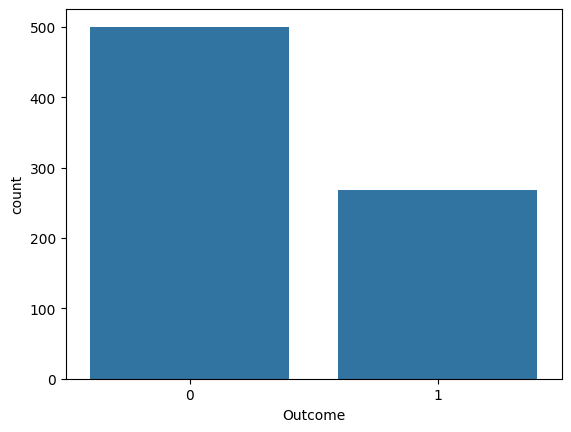

In [55]:
# Plot the bar graph to see the data distribution according to the Outcome column

sns.countplot(x='Outcome', data=diabetes_dataset)

<Axes: xlabel='Outcome', ylabel='Age'>

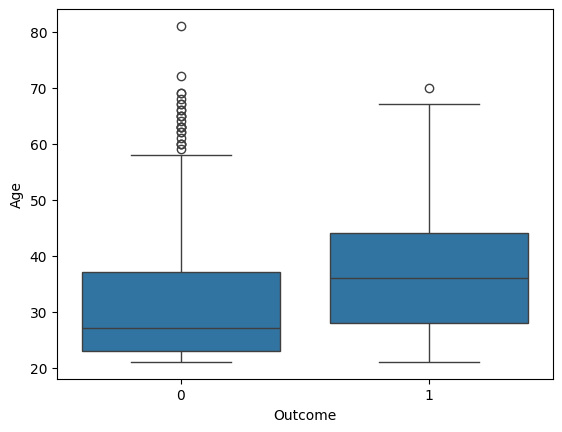

In [58]:
# now plot the box plot to see the outlieries but see all the features name not to over lap in once plotting

sns.boxplot(x='Outcome', y='Age', data=diabetes_dataset)

<Axes: >

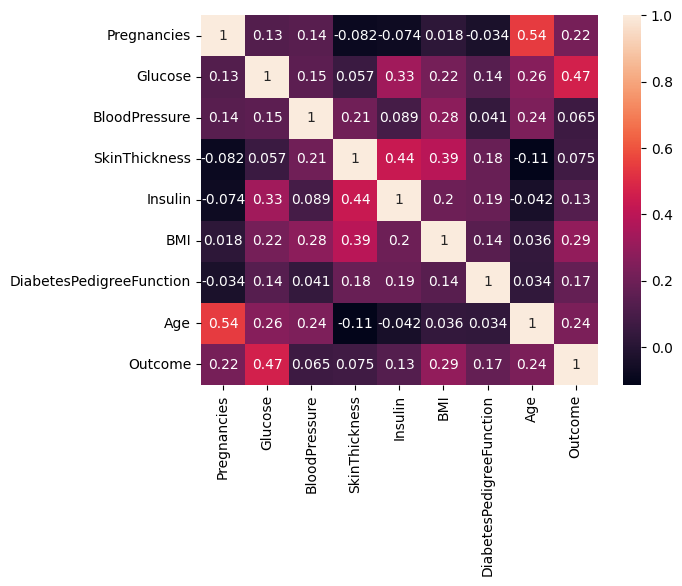

In [61]:
# now plotting the heatmap to see the co-relation between all the features\
sns.heatmap(diabetes_dataset.corr(), annot=True)

In [34]:
# Now we will seperate the Output feature from the independent veriables

X = diabetes_dataset.drop(columns = 'Outcome', axis=1, inplace=False)
Y = diabetes_dataset['Outcome']

In [35]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [36]:
# Now it's time to transform our features

scaler = StandardScaler()

In [37]:
scaler.fit(X)

StandardScaler()

In [38]:
std_data = scaler.transform(X)

In [39]:
std_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [40]:
X = std_data

In [41]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [42]:

print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


So Now It's Time to Train Test Split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [44]:
print(Y_train, Y_test)

619    1
329    0
13     1
476    1
45     1
      ..
303    1
592    1
559    0
725    0
253    0
Name: Outcome, Length: 614, dtype: int64 615    0
80     0
148    0
132    1
501    0
      ..
127    0
185    1
85     0
497    0
86     0
Name: Outcome, Length: 154, dtype: int64


In [45]:
 # Now a look on the data distributed

print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Train Our Support Vector Machine Model

In [46]:
classifier = svm.SVC(kernel='linear')

In [47]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Test




In [48]:
# We are testing on the training data
X_train_predict = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)

In [49]:
print('Accuracy Score of the Training Data : ', training_data_accuracy)

Accuracy Score of the Training Data :  0.7866449511400652


In [50]:
# Now we are testing on the test data
X_test_predict = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)

In [51]:
print('Accuracy Score of the Test Data : ', test_data_accuracy)

Accuracy Score of the Test Data :  0.7727272727272727


Now making the prediction system

In [53]:
input_data = (1,189,60,23,846,30.1,0.398,59)

# changing the input data into the numpy array
input_data_as_numpy_array = np.asarray(input_data)

# now reshape the array as we are just predicting on the one instant
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Now it's time to transform the data into an specific range
std_data_transform = scaler.transform(input_data_reshaped)
print(std_data_transform)

# Now it's time to predict on the unseen data
prediction = classifier.predict(std_data_transform)

# Now change the log statement
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')



[[-0.84488505  2.13150675 -0.47073225  0.15453319  6.65283938 -0.24020459
  -0.2231152   2.19178518]]
The person is diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
